# This notebook plots the error and accuracy of each tested models

In [1]:
import numpy as np
import matplotlib.pyplot as plt

## Reading results files from applied models:

In [2]:
def readResults(path, filename):
    f = open(path + filename, "r")
    perfs = []

    lines = f.readlines()

    indexes = []

    for el in lines:

        values = []
        idxs   = []

        elements = el.split(" ")

        idxs.append(elements[0])

        elements = elements[1:]


        for i, val in enumerate(elements):
            if("\n" not in val):
                if i ==0:
                    values.append(int(val.split(",")[0]))
                else:
                    values.append(float(val.split("=")[1]))
                    idxs.append(val.split("=")[0])


        indexes.append(idxs)
        perfs.append(values)


    f.close()
    return perfs, indexes

#### Plotting the results:

In [3]:
## Defining the plot function:

def plotPerf(Epochs, train_loss, train_acc, valid_bc_acc, valid_loss, valid_window_acc,
             name = "Model", vert_line = False, at_x_value = 40):
    
    plt.figure(figsize=(20,10))

    
    labels = ["training running loss", "training running accuracy", "validation best class accuracy", "validation loss", "validation window accuracy"]
    for i, values in enumerate([train_loss, train_acc, valid_bc_acc, valid_loss, valid_window_acc]):
        plt.plot(Epochs, values, label=labels[i])
    
    ## If the user wants to plot a vertical line, we do so at_x_value:
    if(vert_line):plt.axvline(x=at_x_value,color='gray', label="Optimal Capacity", linestyle='--')
    
    plt.title("The performance of the " + name, fontsize=20)
    plt.xlabel("Number of Epochs", fontsize=15)
    #plt.ylabel("")
    leg = plt.legend(loc='upper right', ncol=1, mode="no", shadow=True, fancybox=True)
    leg.get_frame().set_alpha(0.8)
    plt.show()
    

In [4]:
def PlotPerfs(name, used_var):
    Epochs           = [used_var[i][0] for i in range (0, len(used_var))]
    train_loss       = [used_var[i][1] for i in range (0, len(used_var))]
    train_acc        = [used_var[i][2] for i in range (0, len(used_var))]
    valid_bc_acc     = [used_var[i][3] for i in range (0, len(used_var))]
    valid_loss       = [used_var[i][4] for i in range (0, len(used_var))]
    valid_window_acc = [used_var[i][5] for i in range (0, len(used_var))]
    
    plotPerf(Epochs, train_loss, train_acc, valid_bc_acc, valid_loss, valid_window_acc, name)

    ## Computing max accuracy on validation in percentage:
    Max_accuracy = max(valid_bc_acc) * 100

    print('\n \t\t\t\t Maximum accuracy in percentage on validation set is : {}'.format(int(Max_accuracy* 1.e+3)*1.e-3))

### 1- Results of the model with 1000ms Energy Preprocessing, wlen=800ms and wshift=80ms:

In [5]:
path = "exp/SincNet_DCASE_v2.0/PreprocessingEnergy1000ms_Window800ms/"
filename = "NTF_Energy_Window1000.res"

used_var, indexes = readResults(path, filename)


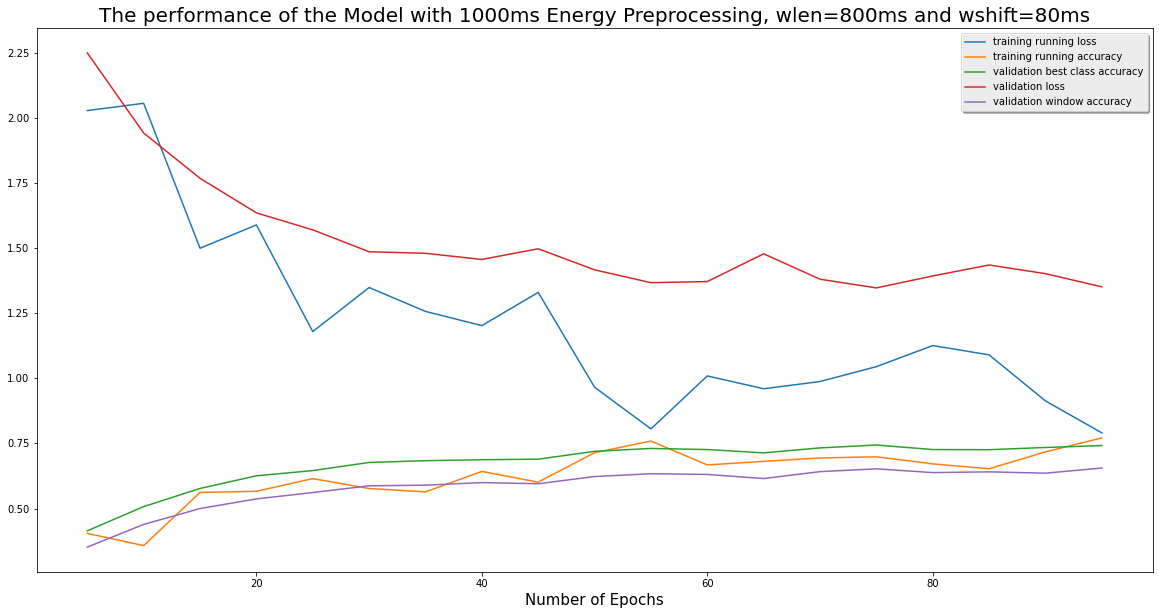


 				 Maximum accuracy in percentage on validation set is : 74.406


In [6]:
## Organizing all the needed data in lists:
name = 'Model with 1000ms Energy Preprocessing, wlen=800ms and wshift=80ms'

PlotPerfs(name, used_var)

<center> 
<b>Remarque, seuil de patience pas assez élevé!</b>
</center>

## Gradient flow of the training:

![Gradient flow of execution](Images/NTF_Energy_Window1000_Gradflow.png)

### 2- Results of the model with 1000ms Energy Preprocessing, patience = 7, wlen=800ms and wshift=80ms:

In [7]:
path = "exp/SincNet_DCASE_v2.0/PreprocessingEnergy1000ms_Window800ms/"
filename = "NTF_Energy_Window1000_p7.res"

used_var, indexes = readResults(path, filename)

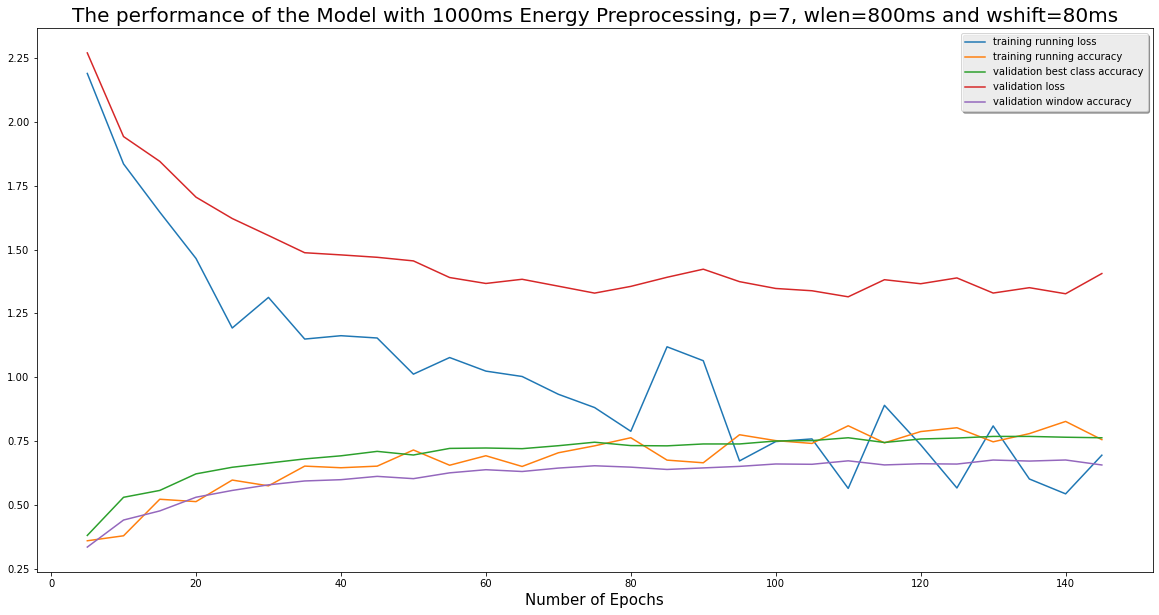


 				 Maximum accuracy in percentage on validation set is : 76.781


In [8]:
## Organizing all the needed data in lists:
name = 'Model with 1000ms Energy Preprocessing, p=7, wlen=800ms and wshift=80ms'

PlotPerfs(name, used_var)

### 3- Results of the model with 1000ms Energy Preprocessing, class_lay=41, patience = 7, wlen=800ms and wshift=80ms:

In [9]:
path = "exp/SincNet_DCASE_v2.0/PreprocessingEnergy1000ms_Window800ms/"
filename = "NTF_Energy_Window1000_p7_try2.res"

used_var, indexes = readResults(path, filename)

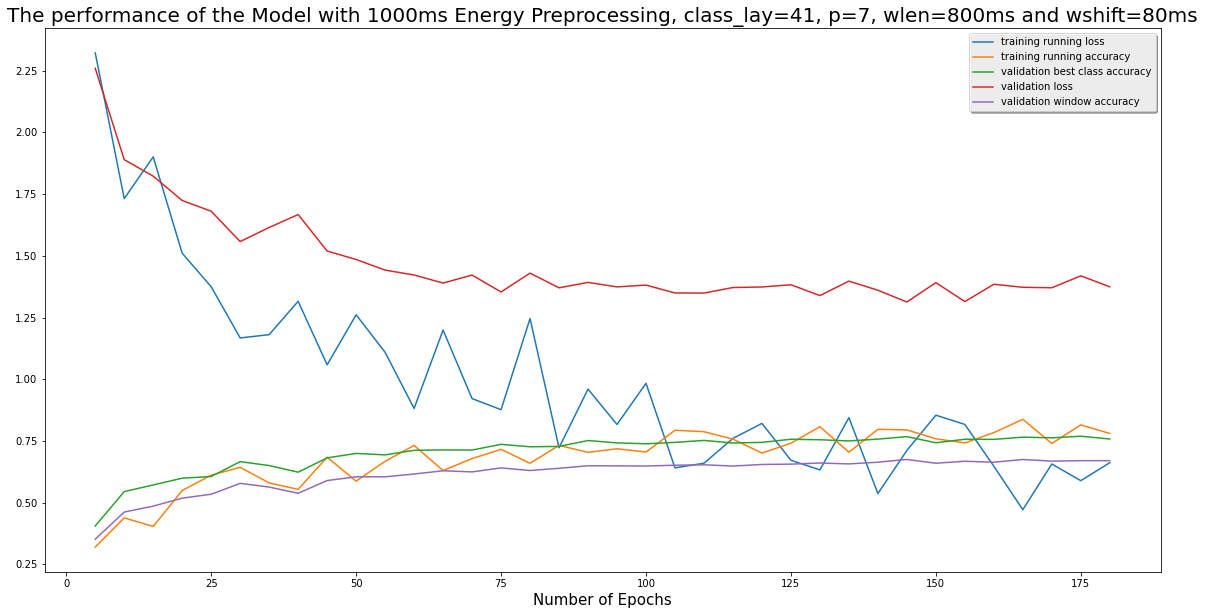


 				 Maximum accuracy in percentage on validation set is : 76.886


In [10]:
## Organizing all the needed data in lists:
name = 'Model with 1000ms Energy Preprocessing, class_lay=41, p=7, wlen=800ms and wshift=80ms'

PlotPerfs(name, used_var)

### 4- Results of the model with 1000ms Energy Preprocessing and repeating signal, class_lay=41, patience = 7, wlen=800ms and wshift=80ms:

In [11]:
path = "exp/SincNet_DCASE_v2.0/EnergyPrepRepeat_Window_800/"
filename = "NTF_EnergyPrepRepeat_Window_800.res"

used_var, indexes = readResults(path, filename)

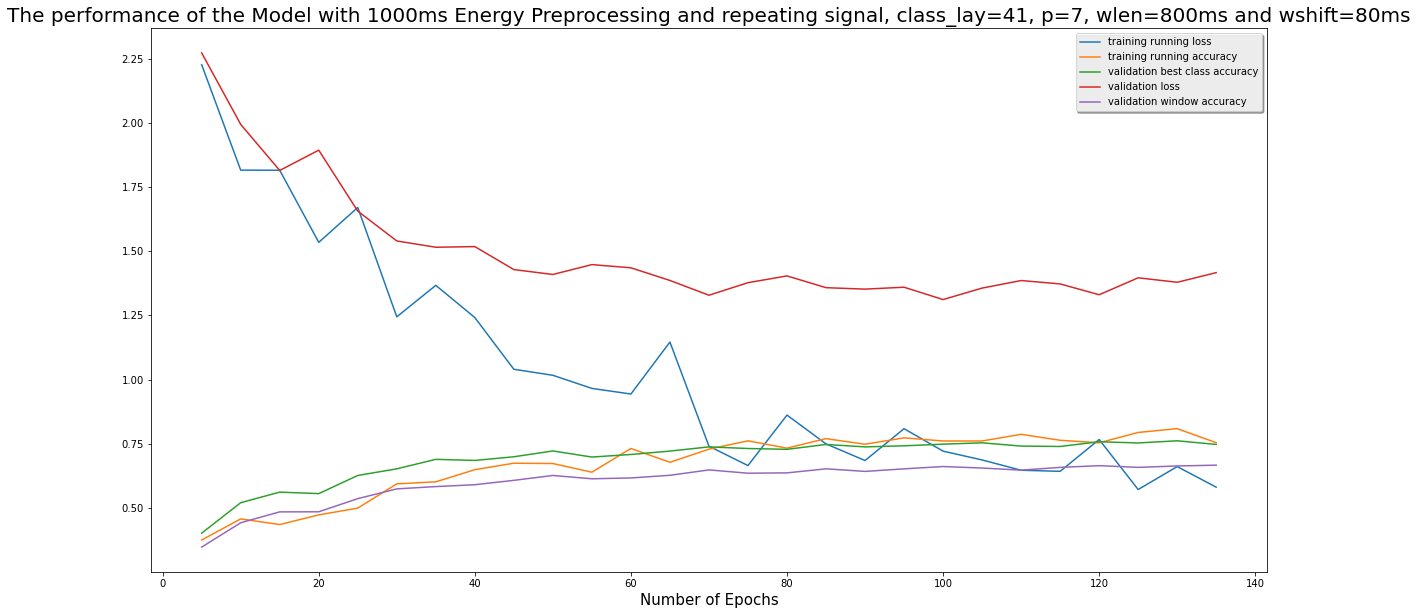


 				 Maximum accuracy in percentage on validation set is : 76.147


In [12]:
## Organizing all the needed data in lists:
name = 'Model with 1000ms Energy Preprocessing and repeating signal, class_lay=41, p=7, wlen=800ms and wshift=80ms'

PlotPerfs(name, used_var)

### Comparison Of the confusion matrices between model 3 and 4:

Regular preprocessing model(3) | Preprocessed with repetitions(4) 
:-----------------------------:|:-------------------------------:
![Regular preprocessing model(3) ](Images/Confusion_Matrices/Conf_Mat_NTF_Energy_Window1000_p7_class41.png)  |  ![Preprocessed with repetitions(4)](Images/Confusion_Matrices/Conf_Mat_NTF_EnergyPrepRepeat_Window_800.png)


### 5- Results of the model with 1000ms Random Zeros Energy Preprocessing, class_lay=41, patience = 7, wlen=800ms and wshift=80ms:

In [13]:
path = "exp/SincNet_DCASE_v2.0/Rand0PreEnergy1000ms_Window800ms/"
filename = path.split("/")[-2] if path.split("/")[-1]=="" else path.split("/")[-1]
filename = filename + ".res"

used_var, indexes = readResults(path, filename)

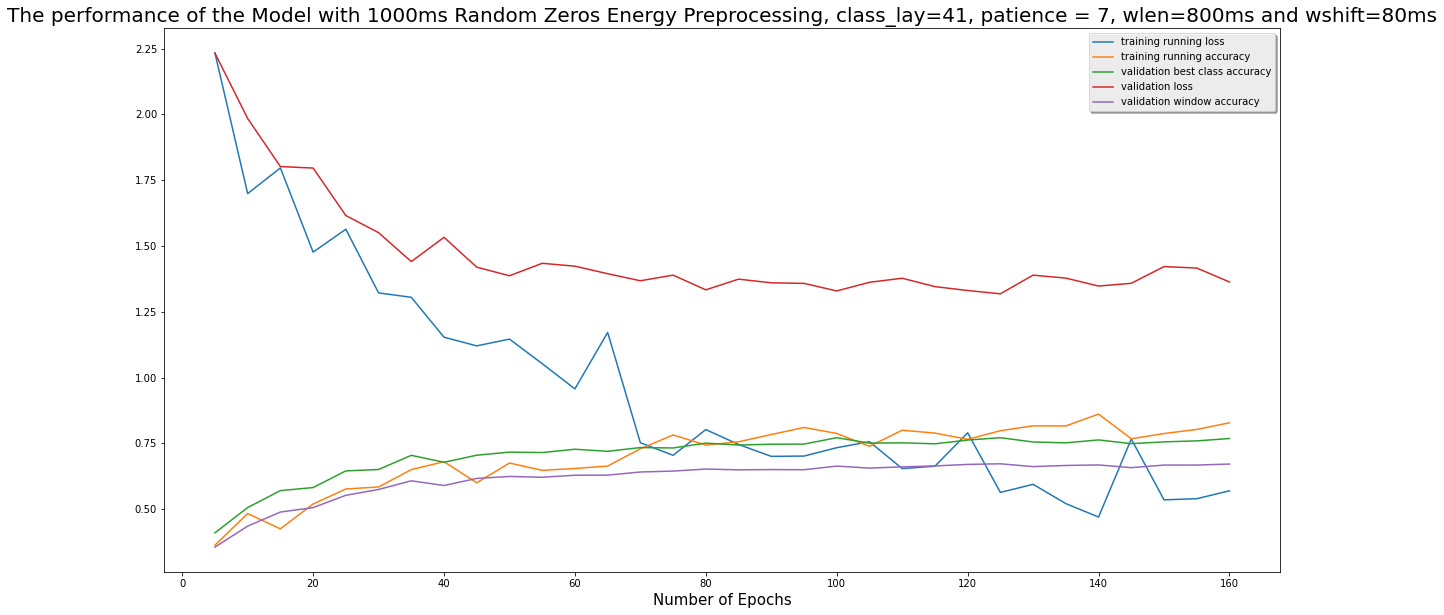


 				 Maximum accuracy in percentage on validation set is : 77.15


In [14]:
## Organizing all the needed data in lists:
name = 'Model with 1000ms Random Zeros Energy Preprocessing, class_lay=41, patience = 7, wlen=800ms and wshift=80ms'

PlotPerfs(name, used_var)

### 6- Results of the model with 1000ms Random Zeros Energy Preprocessing, class_lay=41, patience = 7, Drop=30%, wlen=800ms and wshift=80ms:

In [15]:
path = "exp/SincNet_DCASE_v2.0/Rand0PreEnergy1000ms_Window800ms_Drop30/"
filename = path.split("/")[-2] if path.split("/")[-1]=="" else path.split("/")[-1]
filename = filename + ".res"

used_var, indexes = readResults(path, filename)

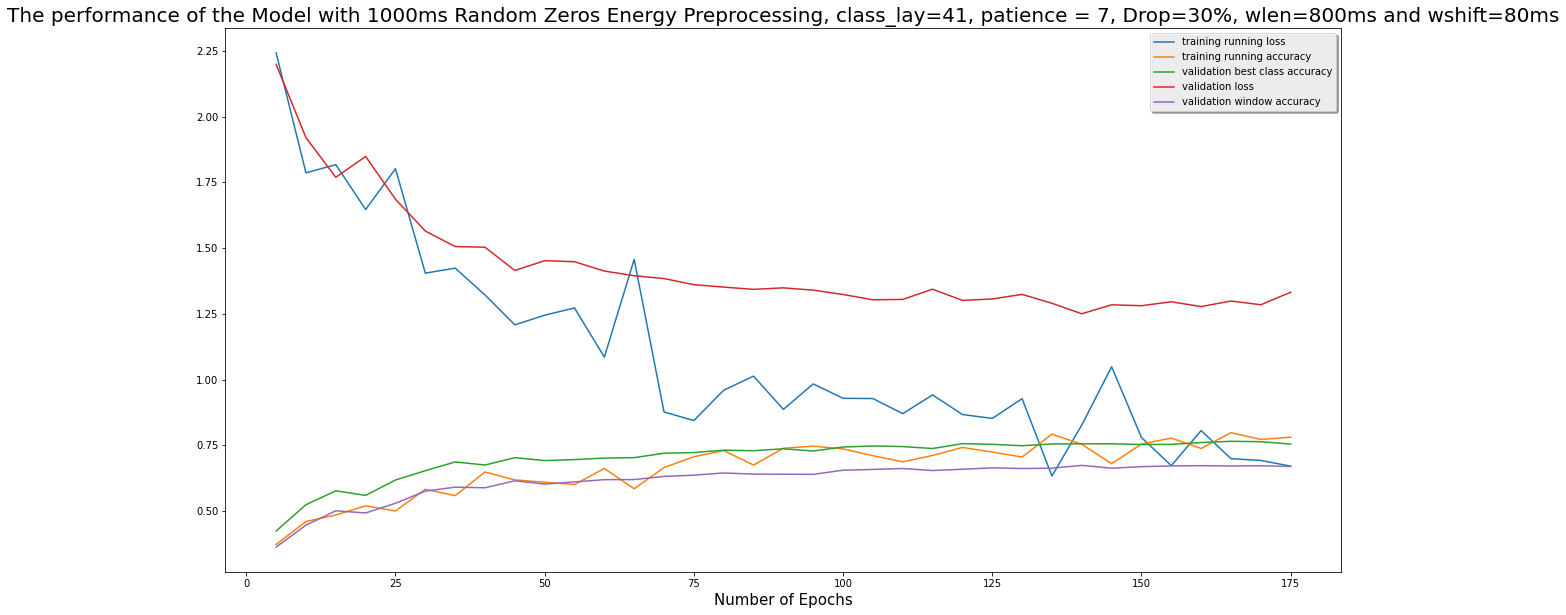


 				 Maximum accuracy in percentage on validation set is : 76.517


In [16]:
## Organizing all the needed data in lists:
name = 'Model with 1000ms Random Zeros Energy Preprocessing, class_lay=41, patience = 7, Drop=30%, wlen=800ms and wshift=80ms'

PlotPerfs(name, used_var)

## With Mixup Results:

### I- Intra Class mixup:

#### 1- Results of the model with 1000ms Energy Preprocessing, mixup Beta=0.5, patience = 7, wlen=800ms and wshift=80ms:

In [17]:
path = "exp/SincNet_DCASE_v2.0/PreprocessingEnergy1000ms_Window800ms_withMixup/"
filename = "NTF_Energy_Window1000_p7_withMixup.res"

used_var, indexes = readResults(path, filename)

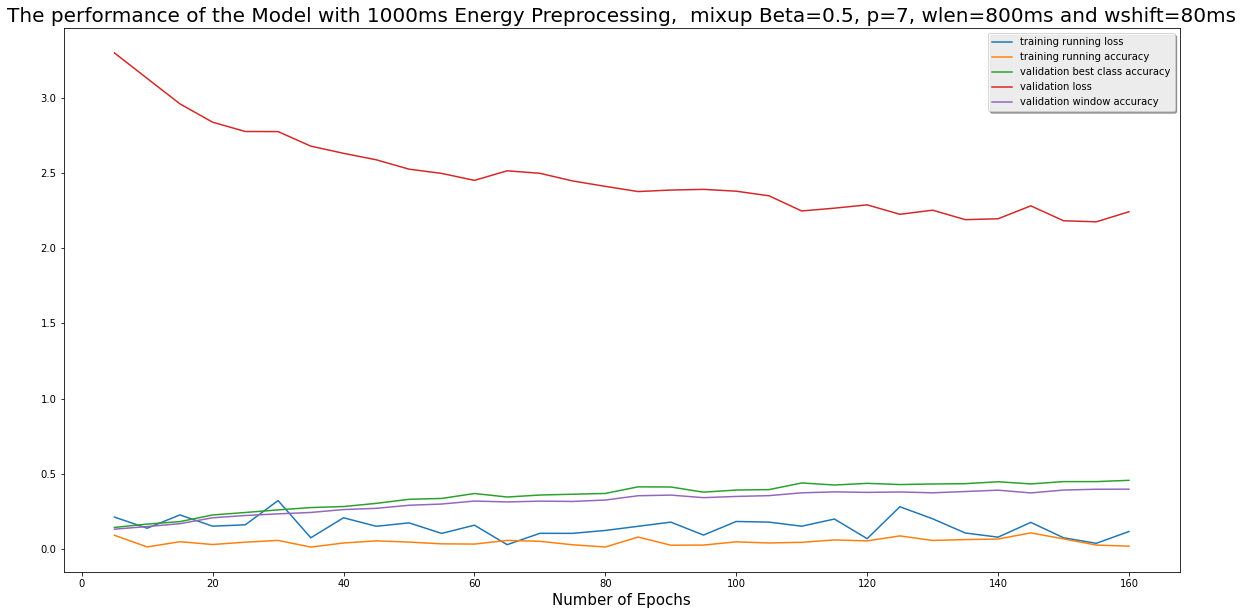


 				 Maximum accuracy in percentage on validation set is : 45.699


In [18]:
## Organizing all the needed data in lists:
name = 'Model with 1000ms Energy Preprocessing,  mixup Beta=0.5, p=7, wlen=800ms and wshift=80ms'

PlotPerfs(name, used_var)

#### 2- Results of the model with 1000ms Energy Preprocessing, RMSProp moment=0.9, mixup Beta=0.1, patience=7, wlen=800ms and wshift=80ms:

In [19]:
path = "exp/SincNet_DCASE_v2.0/PreprocessingEnergy1000ms_Window800ms_withMixup/"
filename = "NTF_Energy_Window1000_p7_withMixup_beta0.1.res"

used_var, indexes = readResults(path, filename)

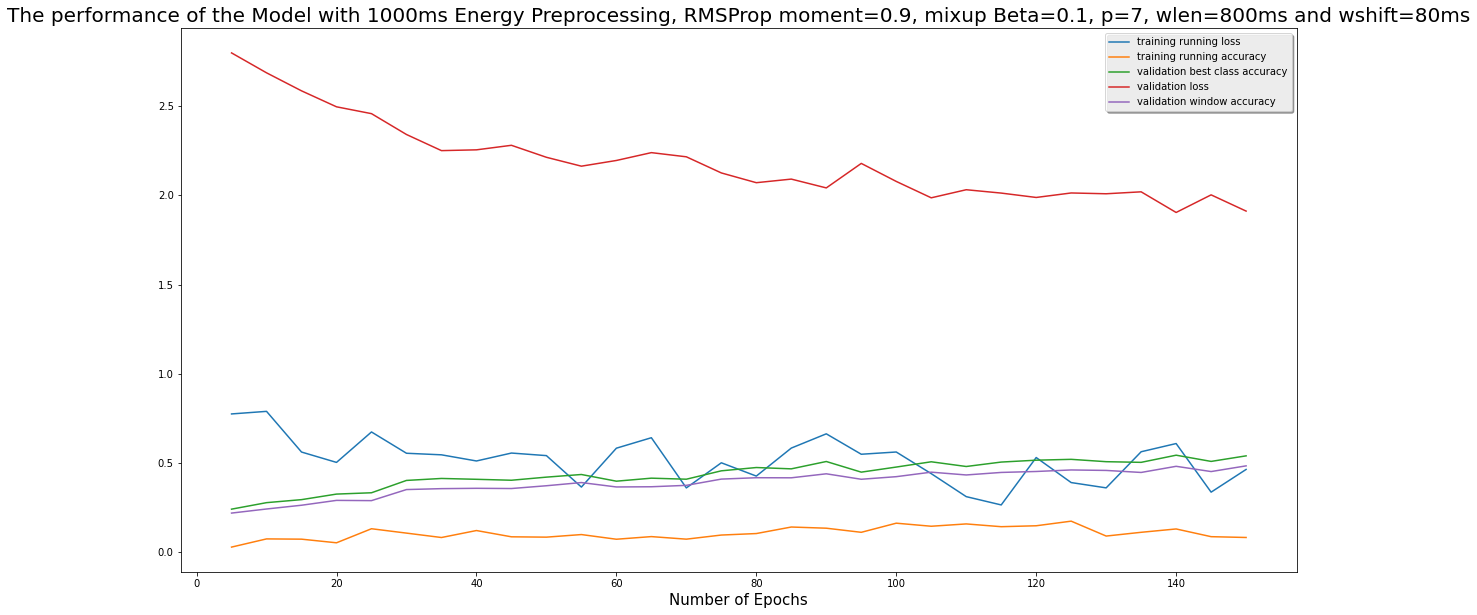


 				 Maximum accuracy in percentage on validation set is : 54.406


In [20]:
## Organizing all the needed data in lists:
name = 'Model with 1000ms Energy Preprocessing, RMSProp moment=0.9, mixup Beta=0.1, p=7, wlen=800ms and wshift=80ms'

PlotPerfs(name, used_var)

#### 3- Results of the model with 1000ms Energy Preprocessing, RMSProp moment=0.9, mixup Beta=0.01, patience=7, wlen=800ms and wshift=80ms:

In [21]:
path = "exp/SincNet_DCASE_v2.0/PreprocessingEnergy1000ms_Window800ms_withMixup/"
filename = "NTF_Energy_Window1000_p7_beta0.01_try2.res"

used_var, indexes = readResults(path, filename)

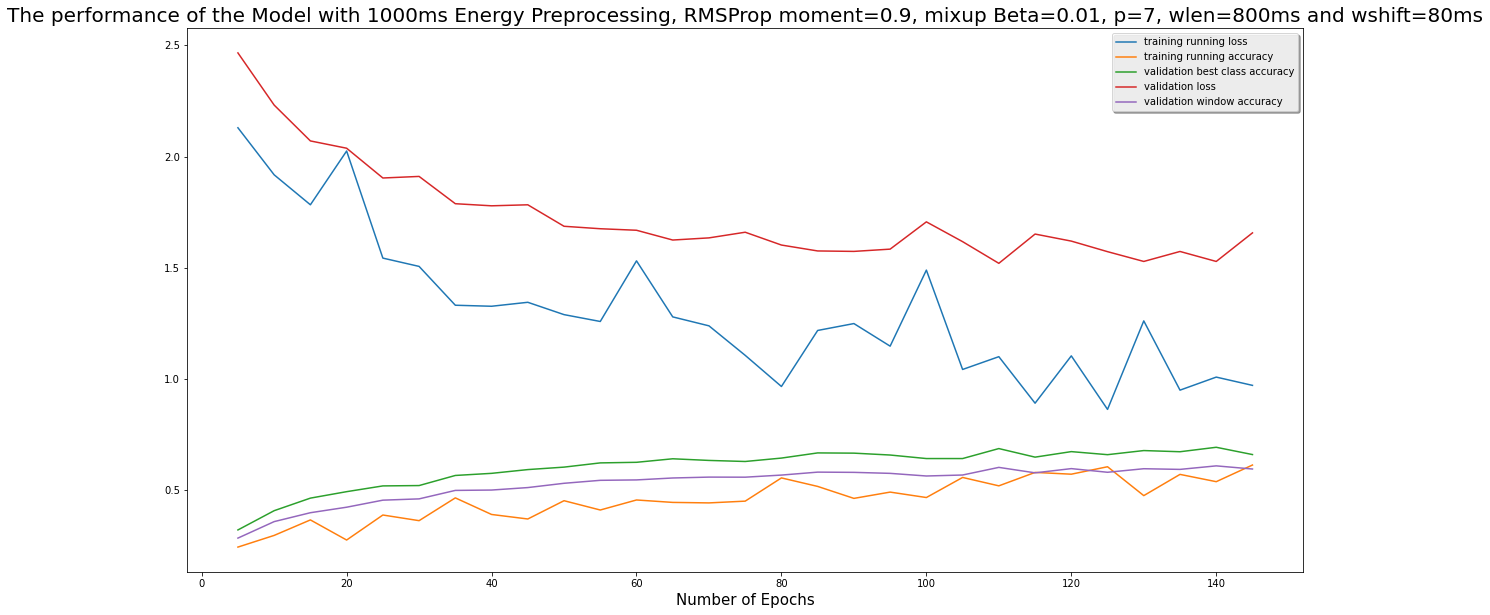


 				 Maximum accuracy in percentage on validation set is : 69.34


In [22]:
## Organizing all the needed data in lists:
name = 'Model with 1000ms Energy Preprocessing, RMSProp moment=0.9, mixup Beta=0.01, p=7, wlen=800ms and wshift=80ms'

PlotPerfs(name, used_var)

#### 4- Results of the model with 1000ms Energy Preprocessing, RMSProp moment=0.9, mixup Beta=0.2, Drop=0.3, patience=7, wlen=800ms and wshift=80ms:

In [23]:
path = "exp/SincNet_DCASE_v2.0/PreprocessingEnergy1000ms_Window800ms_withMixup0.2_Drop30/"
filename = path.split("/")[-2] if path.split("/")[-1]=="" else path.split("/")[-1]
filename = filename + ".res"

used_var, indexes = readResults(path, filename)

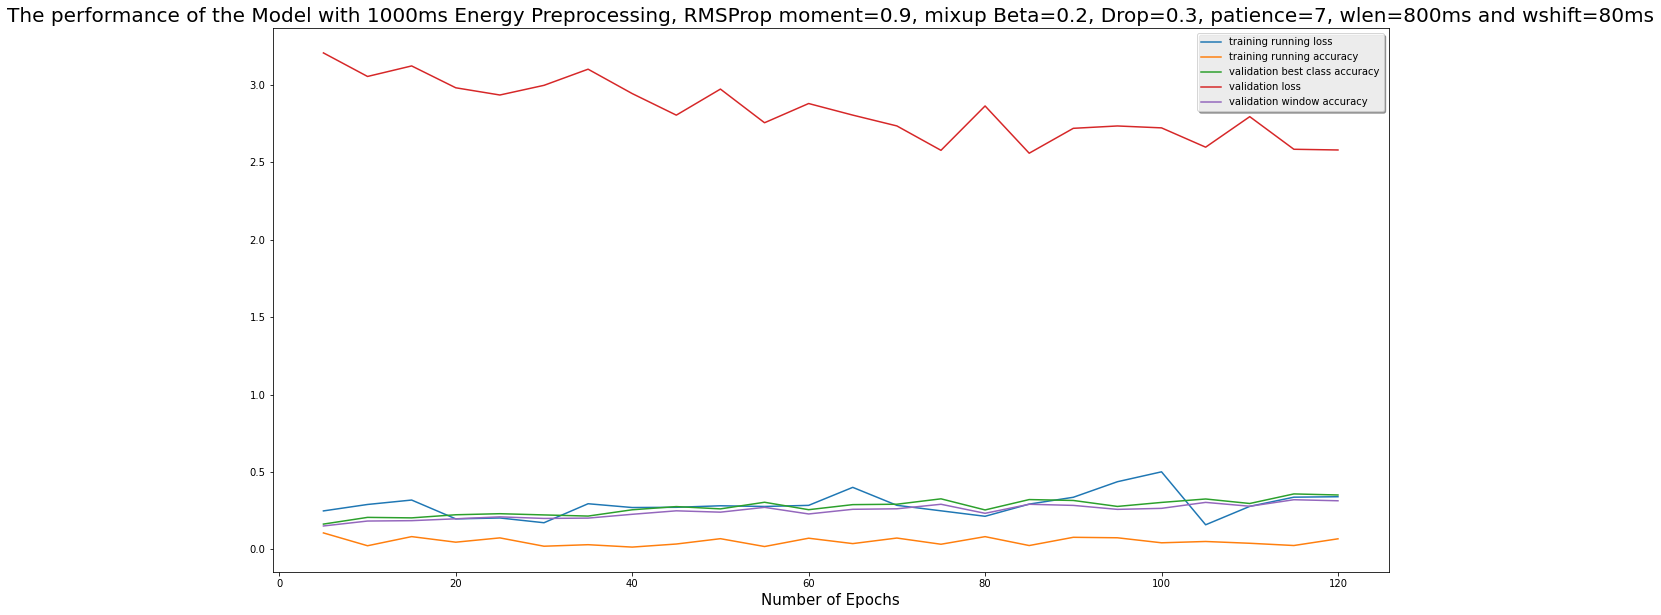


 				 Maximum accuracy in percentage on validation set is : 35.831


In [24]:
## Organizing all the needed data in lists:
name = 'Model with 1000ms Energy Preprocessing, RMSProp moment=0.9, mixup Beta=0.2, Drop=0.3, patience=7, wlen=800ms and wshift=80ms'

PlotPerfs(name, used_var)

### II- Inter Class mixup:

#### 1- Results of the model with 1000ms Energy Preprocessing, RMSProp moment=0.9, same class mixup Beta=0.1, patience=7, wlen=800ms and wshift=80ms:

In [25]:
path = "exp/SincNet_DCASE_v2.0/PreprocessingEnergy1000ms_Window800ms_withMixup/"
filename = "NTF_Energy_Window1000_p7_withSameClassMixup_beta0.1.res"

used_var, indexes = readResults(path, filename)

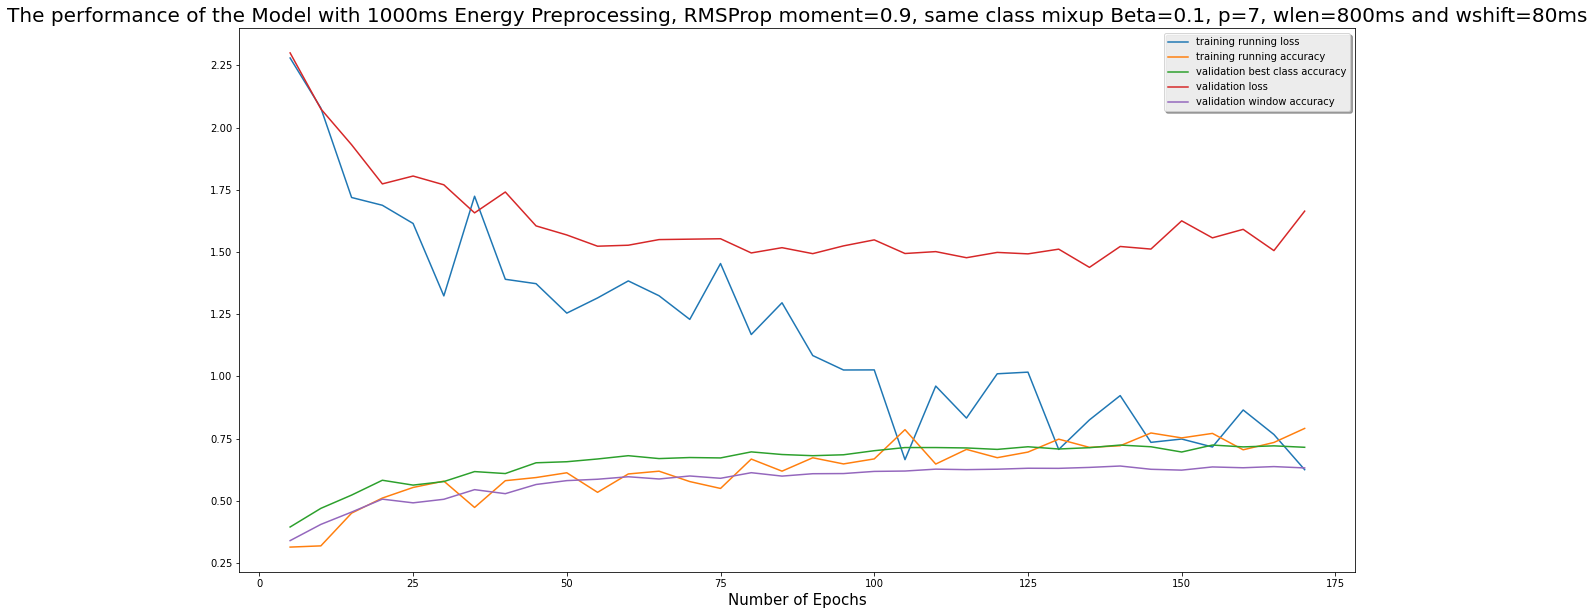


 				 Maximum accuracy in percentage on validation set is : 72.401


In [26]:
## Organizing all the needed data in lists:
name = 'Model with 1000ms Energy Preprocessing, RMSProp moment=0.9, same class mixup Beta=0.1, p=7, wlen=800ms and wshift=80ms'

PlotPerfs(name, used_var)

#### 2- Results of the model with 1000ms Energy Preprocessing, RMSProp moment=0.9, same class mixup Beta=0.4, patience=7, wlen=800ms and wshift=80ms:

In [27]:
path = "exp/SincNet_DCASE_v2.0/PreprocessingEnergy1000ms_Window800ms_withMixup/NTF_Energy_Window1000_p7_withSameClassMixup_beta0.4/"
filename = path.split("/")[-2] if path.split("/")[-1]=="" else path.split("/")[-1]
filename = filename + ".res"

used_var, indexes = readResults(path, filename)

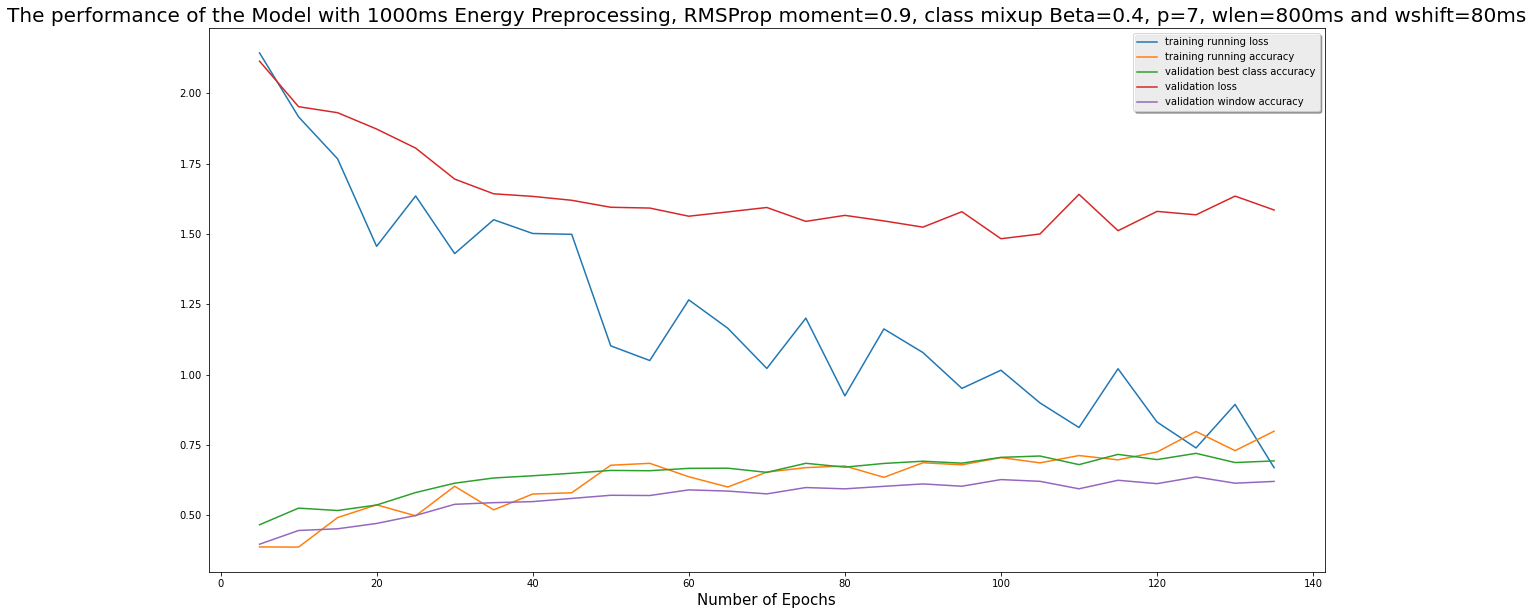


 				 Maximum accuracy in percentage on validation set is : 72.084


In [28]:
## Organizing all the needed data in lists:
name = 'Model with 1000ms Energy Preprocessing, RMSProp moment=0.9, class mixup Beta=0.4, p=7, wlen=800ms and wshift=80ms'

PlotPerfs(name, used_var)

## Different activation function results:

### I- PReLu

#### 1- Results of the model with 1000ms Random Zeros Energy Preprocessing, 4 Hidden layers, PReLu act for Dnn, class_lay=41, patience = 7, Drop=30%, wlen=800ms and wshift=80ms:

In [29]:
path = "exp/SincNet_DCASE_v2.0/Rand0PreEnergy1000ms_Window800ms_HiddenLay4_PReLu_Drop30/"
filename = path.split("/")[-2] if path.split("/")[-1]=="" else path.split("/")[-1]
filename = filename + ".res"

used_var, indexes = readResults(path, filename)

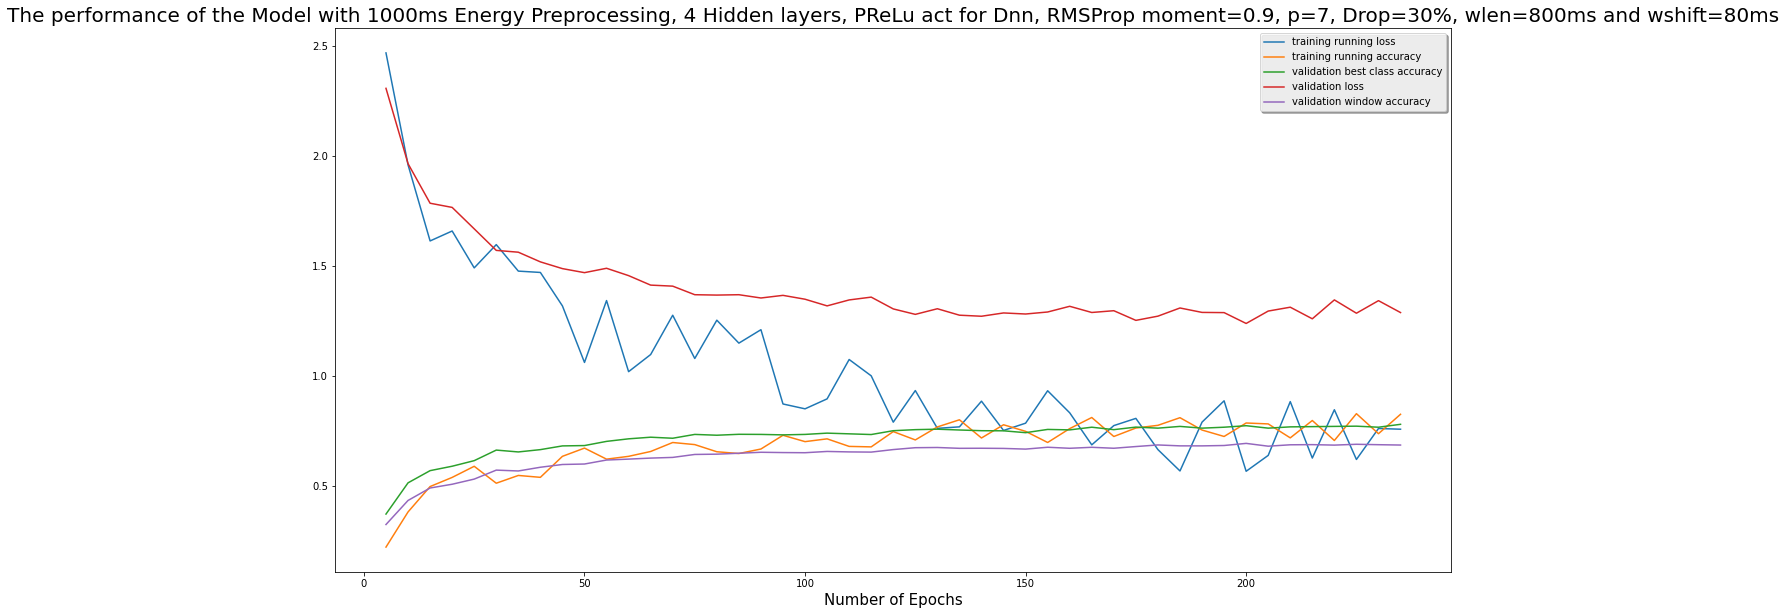


 				 Maximum accuracy in percentage on validation set is : 78.152


In [30]:
## Organizing all the needed data in lists:
name = 'Model with 1000ms Energy Preprocessing, 4 Hidden layers, PReLu act for Dnn, RMSProp moment=0.9, p=7, Drop=30%, wlen=800ms and wshift=80ms'
 
PlotPerfs(name, used_var)

#### 2- Results of the model with 1000ms Random Zeros Energy Preprocessing,  PReLu act for Dnn, class_lay=41, patience = 7, Drop=30%, wlen=800ms and wshift=80ms:

In [31]:
path = "exp/SincNet_DCASE_v2.0/Rand0PreEnergy1000ms_Window800ms_PReLu_Drop30/"
filename = path.split("/")[-2] if path.split("/")[-1]=="" else path.split("/")[-1]
filename = filename + ".res"

used_var, indexes = readResults(path, filename)

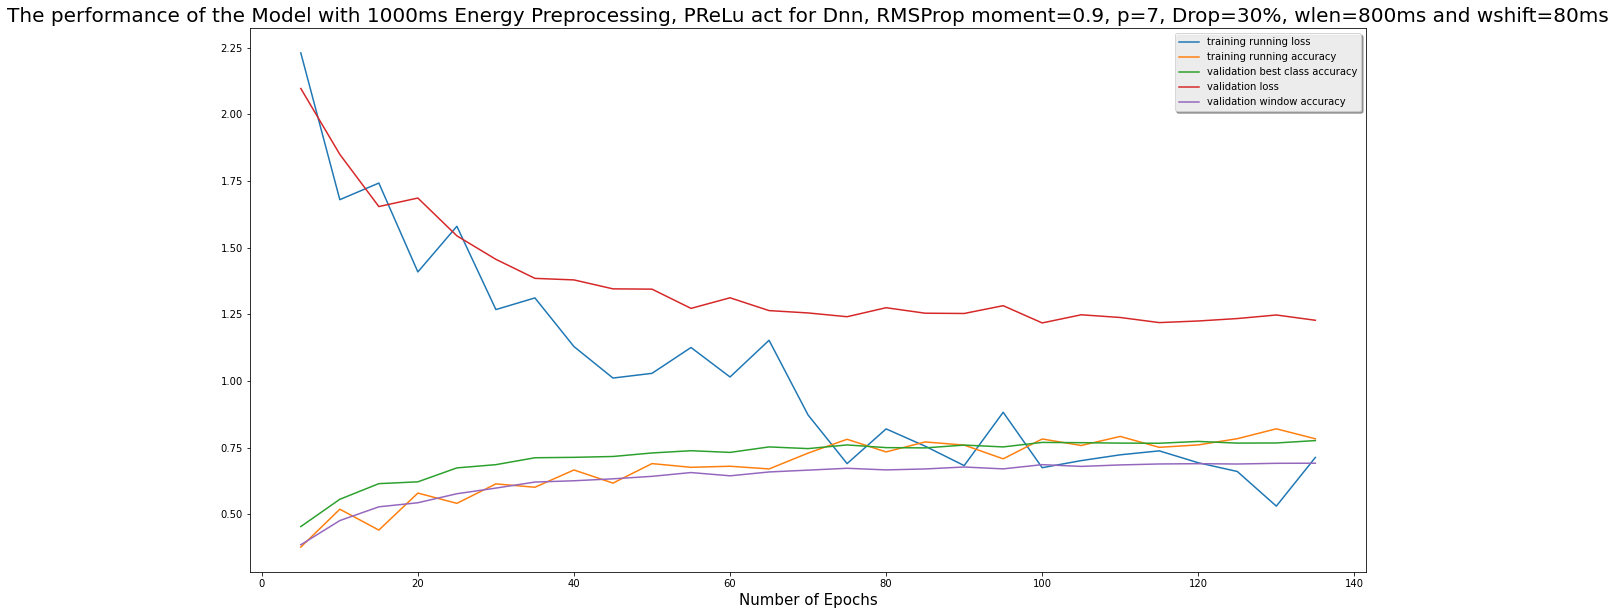


 				 Maximum accuracy in percentage on validation set is : 77.678


In [32]:
## Organizing all the needed data in lists:
name = 'Model with 1000ms Energy Preprocessing, PReLu act for Dnn, RMSProp moment=0.9, p=7, Drop=30%, wlen=800ms and wshift=80ms'

PlotPerfs(name, used_var)

#### 3- Results of the model with 1000ms Random Zeros Energy Preprocessing, 4 Hidden Layers, PReLu act for Dnn, class_lay=41, patience = 9, wlen=800ms and wshift=80ms:

In [33]:
path = "exp/SincNet_DCASE_v2.0/Rand0PreEnergy1000ms_Window800ms_HiddenLay4_PReLu_p9/"
filename = path.split("/")[-2] if path.split("/")[-1]=="" else path.split("/")[-1]
filename = filename + ".res"

used_var, indexes = readResults(path, filename)

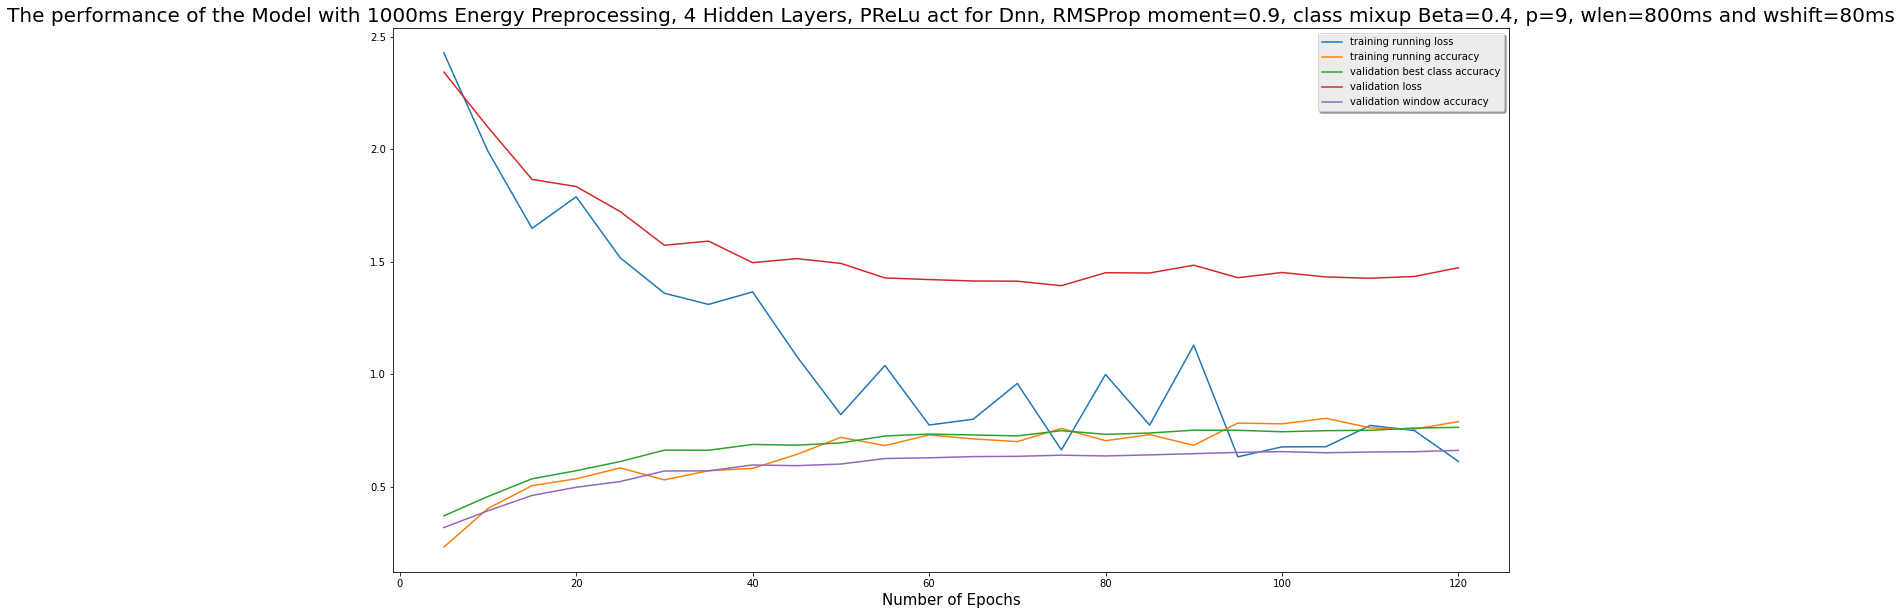


 				 Maximum accuracy in percentage on validation set is : 76.517


In [34]:
## Organizing all the needed data in lists:
name = 'Model with 1000ms Energy Preprocessing, 4 Hidden Layers, PReLu act for Dnn, RMSProp moment=0.9, class mixup Beta=0.4, p=9, wlen=800ms and wshift=80ms'

PlotPerfs(name, used_var)

#### 4- Results of the model with 1000ms Random Zeros Energy Preprocessing, PReLu act for Dnn, class_lay=41, patience = 9, wlen=800ms and wshift=80ms:

In [35]:
path = "exp/SincNet_DCASE_v2.0/Rand0PreEnergy1000ms_Window800ms_PReLu_p9/"
filename = path.split("/")[-2] if path.split("/")[-1]=="" else path.split("/")[-1]
filename = filename + ".res"

used_var, indexes = readResults(path, filename)

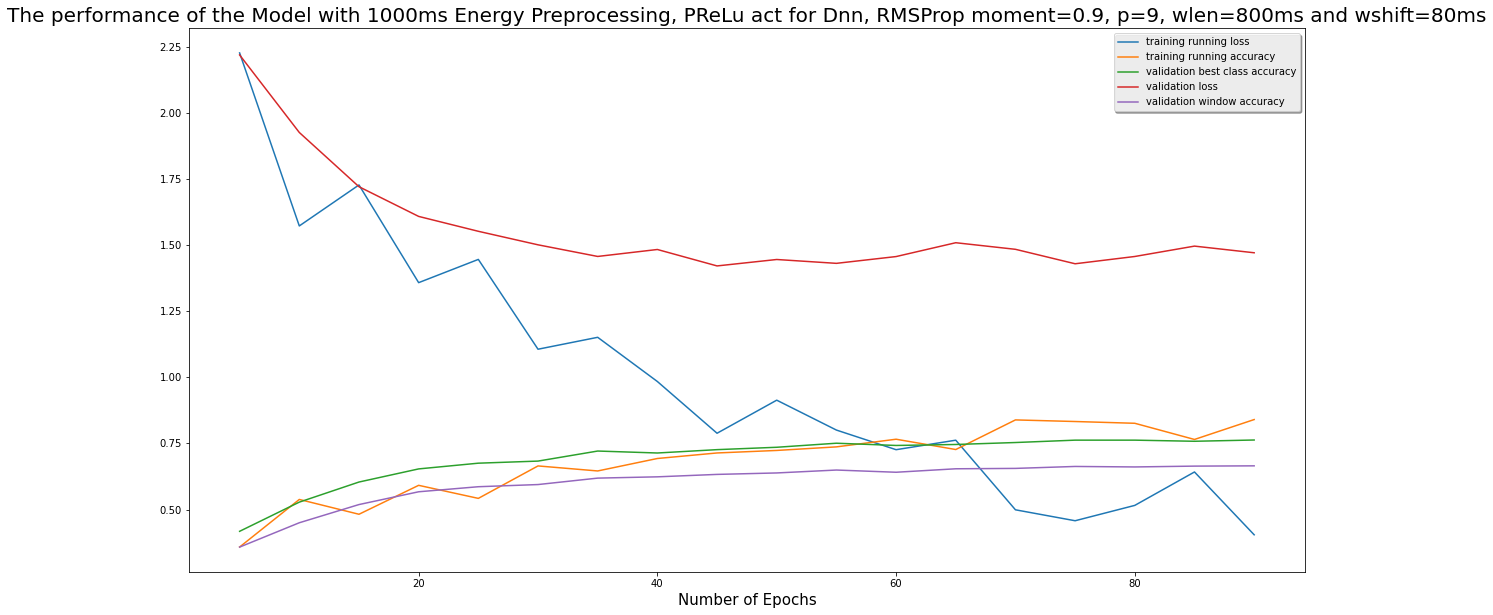


 				 Maximum accuracy in percentage on validation set is : 76.306


In [36]:
## Organizing all the needed data in lists:
name = 'Model with 1000ms Energy Preprocessing, PReLu act for Dnn, RMSProp moment=0.9, p=9, wlen=800ms and wshift=80ms'

PlotPerfs(name, used_var)

#### 5- Results of the model with 1000ms Random Zeros Energy Preprocessing, CNN layers = 4, PReLu act for Dnn, class_lay=41, Drop = 30, patience = 7, wlen=800ms and wshift=80ms:

In [37]:
path = "exp/SincNet_DCASE_v2.0/CNNlay4_Rand0PreEnergy1000ms_Window800ms_PReLu_Drop30/"
filename = path.split("/")[-2] if path.split("/")[-1]=="" else path.split("/")[-1]
filename = filename + ".res"

used_var, indexes = readResults(path, filename)

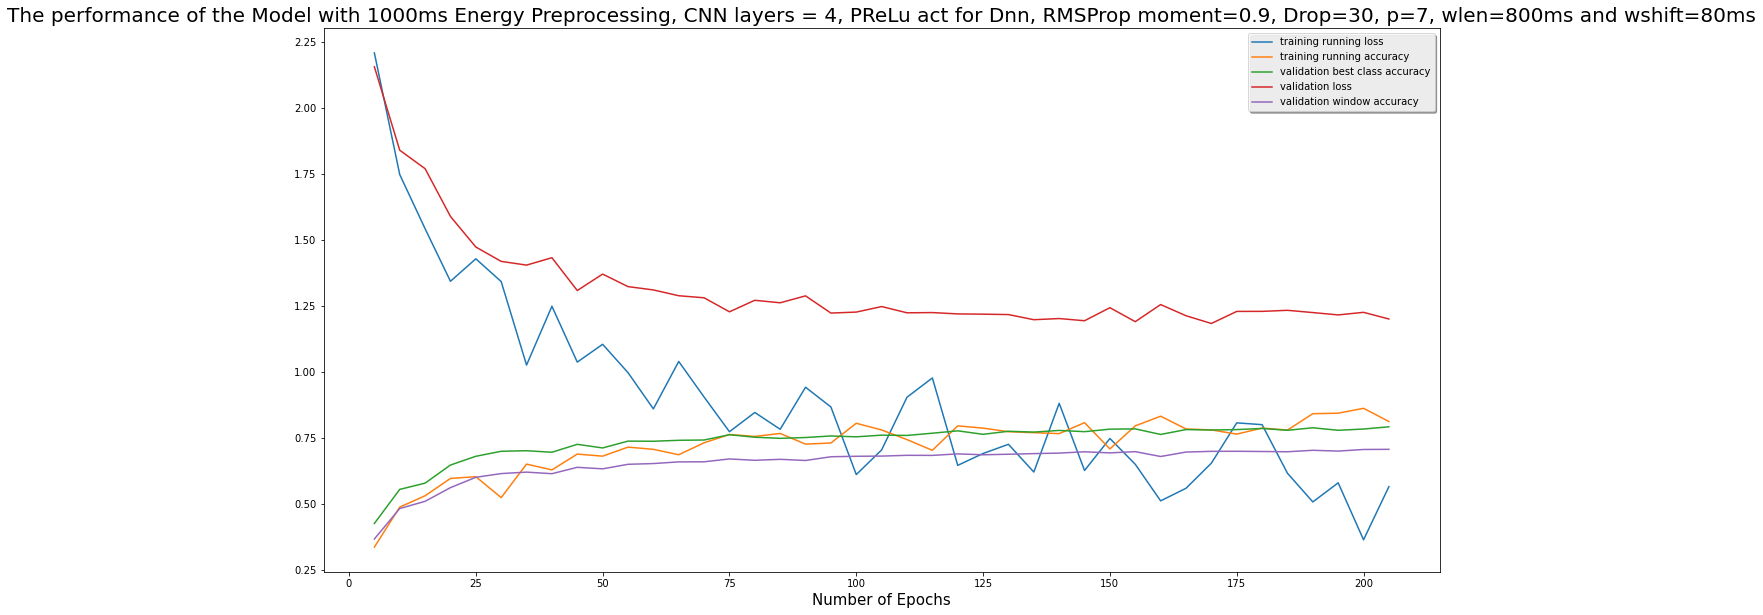


 				 Maximum accuracy in percentage on validation set is : 79.155


In [38]:
## Organizing all the needed data in lists:
name = 'Model with 1000ms Energy Preprocessing, CNN layers = 4, PReLu act for Dnn, RMSProp moment=0.9, Drop=30, p=7, wlen=800ms and wshift=80ms'

PlotPerfs(name, used_var)

#### 6- Results of the model with 1000ms Random Zeros Energy Preprocessing, CNN layers = 4, With Scheduler, PReLu act for Dnn, class_lay=41, patience = 9, wlen=800ms and wshift=80ms:

In [39]:
path = "exp/SincNet_DCASE_v2.0/CNNlay4_Rand0PreEnergy1000ms_Window800ms_PReLu_Drop30/"
filename = path.split("/")[-2] if path.split("/")[-1]=="" else path.split("/")[-1]
## Overrides the file name
filename = 'CNNlay4_Rand0PreEnergy1000ms_Scheduler_Window800ms_PReLu_Drop30'
filename = filename + ".res"

used_var, indexes = readResults(path, filename)

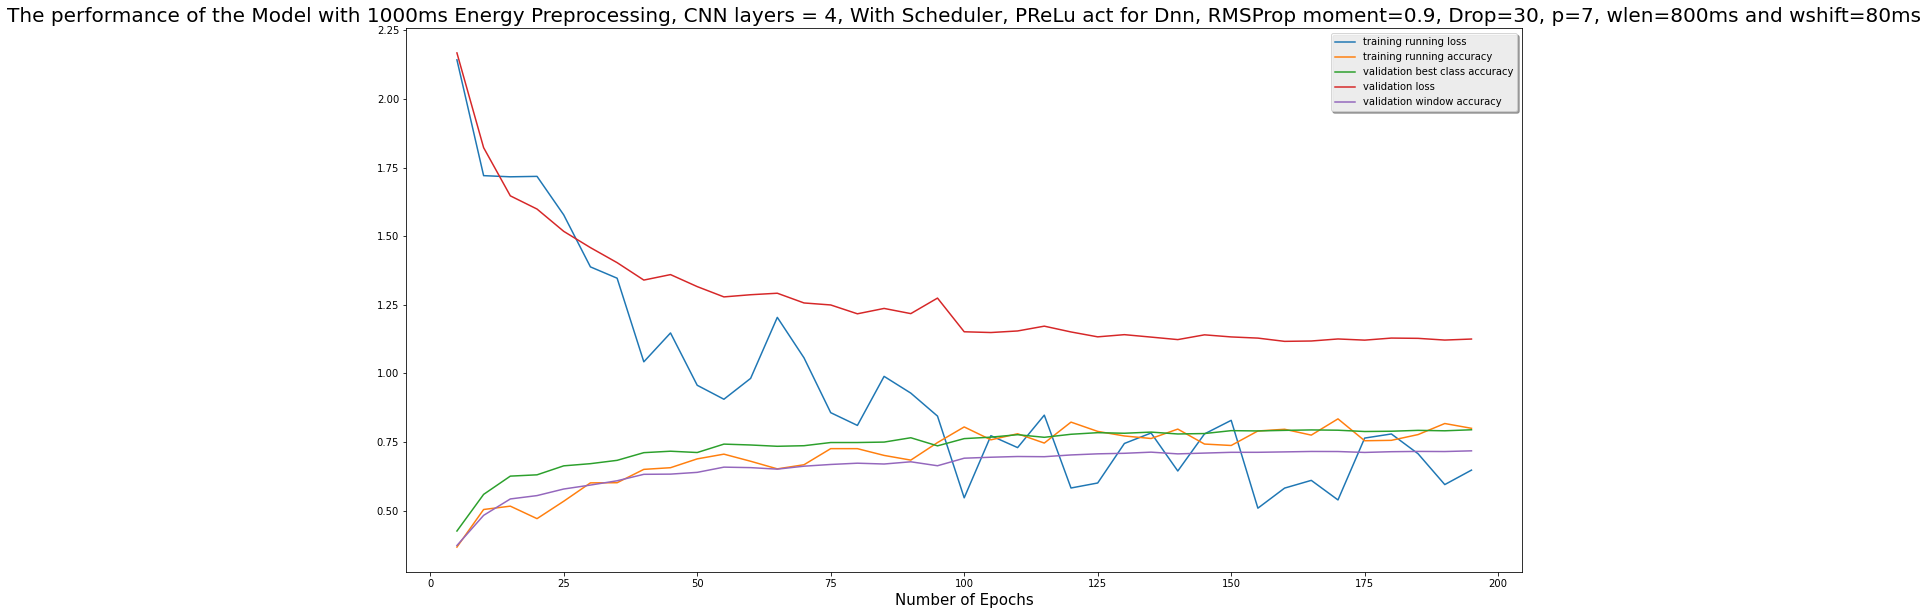


 				 Maximum accuracy in percentage on validation set is : 79.47200000000001


In [40]:
## Organizing all the needed data in lists:
name = 'Model with 1000ms Energy Preprocessing, CNN layers = 4, With Scheduler, PReLu act for Dnn, RMSProp moment=0.9, Drop=30, p=7, wlen=800ms and wshift=80ms'

PlotPerfs(name, used_var)